In [29]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/ecommerce_demand_forecast.csv')

# Display the first few rows and the column names
print(df.head())
print(df.columns)

             timestamp         category  product_price  availability    brand  \
0  2024-04-05 04:09:00          Fashion         351.21         False  Brand E   
1  2024-12-12 19:46:00            Books         408.99         False  Brand D   
2  2024-10-21 19:28:00  Health & Beauty         152.08         False  Brand A   
3  2024-03-03 01:34:00            Books         141.80          True  Brand C   
4  2024-11-05 16:59:00            Books         171.77          True  Brand C   

   discount_percentage region       city  page_views  clicks  add_to_cart  \
0                   25  South     Mumbai           5     199           45   
1                   10   East  Bangalore         130      26           30   
2                   25   East  Bangalore         144     199           22   
3                   20  South    Kolkata         476      72           49   
4                   30   East    Chennai         147     114           38   

   purchases  search_count  social_trend_score  co

             timestamp         category  product_price  availability    brand  \
0  2024-04-05 04:09:00          Fashion         351.21         False  Brand E   
1  2024-12-12 19:46:00            Books         408.99         False  Brand D   
2  2024-10-21 19:28:00  Health & Beauty         152.08         False  Brand A   
3  2024-03-03 01:34:00            Books         141.80          True  Brand C   
4  2024-11-05 16:59:00            Books         171.77          True  Brand C   

   discount_percentage region       city  page_views  clicks  add_to_cart  \
0                   25  South     Mumbai           5     199           45   
1                   10   East  Bangalore         130      26           30   
2                   25   East  Bangalore         144     199           22   
3                   20  South    Kolkata         476      72           49   
4                   30   East    Chennai         147     114           38   

   purchases  search_count  social_trend_score  co

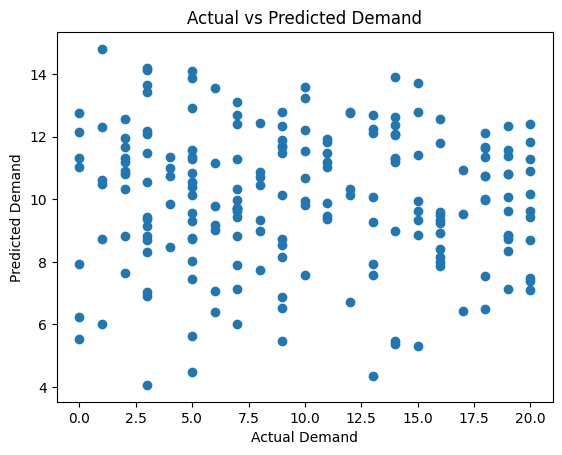

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/ecommerce_demand_forecast.csv')

# Check the columns and data types
print(df.head())
print(df.columns)

# Assuming 'timestamp' is the date column, we can extract features from it
if 'timestamp' in df.columns:
    df['date'] = pd.to_datetime(df['timestamp'])
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
else:
    print("No date column found. Please check the dataset.")

# Define the features and target variable
# Adjust the features based on your dataset
X = df[['day', 'month', 'year', 'product_price', 'discount_percentage', 'availability']]
y = df['purchases']  # Assuming 'purchases' is the target variable for demand

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the scaled data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model using mean squared error, mean absolute error, and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

# Convert the demand values to binary classes (0: low demand, 1: high demand)
threshold = y.mean()  # Set threshold as the mean of the target variable
y_test_binary = np.where(y_test > threshold, 1, 0)
y_pred_binary = np.where(y_pred > threshold, 1, 0)

# Evaluate the model using accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test_binary, y_pred_binary)
report = classification_report(y_test_binary, y_pred_binary)
conf_mat = confusion_matrix(y_test_binary, y_pred_binary)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_mat)

# Plot the predicted demand values against the actual demand values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.show()